## 4.1 

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%timeit for _ in range(10): my_arr2 = my_arr * 2
%timeit for _ in range(10): my_list2 = [x*2 for x in my_list]
# 各个序列分别乘以2， 执行10次，array用时更短

35.1 ms ± 494 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.42 s ± 79.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
data = np.random.randn(2,3)   # 生成标准正态分布
data

array([[ 0.77002066, -0.02375063,  0.60443442],
       [ 1.91433671,  0.94865286, -1.28626172]])

In [5]:
data*10

array([[  7.70020657,  -0.2375063 ,   6.04434423],
       [ 19.14336713,   9.48652864, -12.86261724]])

In [6]:
data + data

array([[ 1.54004131, -0.04750126,  1.20886885],
       [ 3.82867343,  1.89730573, -2.57252345]])

In [7]:
data.shape

(2, 3)

In [8]:
data.dtype   # 数组元素的类型

dtype('float64')

In [9]:
# 创建数组
print(np.zeros(10))
print(np.zeros((3,6)))   # 传入表示形状的元组

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [10]:
arr = np.array([1, 2, 3], dtype=np.float64)   #指定元素类型
int_arr = arr.astype(np.int64)
int_arr.dtype

dtype('int64')

### 索引和切片

In [11]:
arr = np.arange(10)
arr_slice = arr[5:8]
arr_slice  

array([5, 6, 7])

In [12]:
# 数组切片的任何修改都会直接反映到原数组上
arr_slice[0] = 100
arr
# 除非使用arr_slice[0].copy()

array([  0,   1,   2,   3,   4, 100,   6,   7,   8,   9])

In [13]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [14]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
arr2d[:2]  #取二维数组前两行

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
arr2d[:2, 1:]  # 取前两行，后两列

array([[2, 3],
       [5, 6]])

In [17]:
print(arr2d[:, :1])  # 只有冒号表示选取整个轴
print(arr2d[:, :1].shape)

[[1]
 [4]
 [7]]
(3, 1)


In [18]:
print(arr2d[:, 1])
print(arr2d[:, 1].shape)

[2 5 8]
(3,)


In [19]:
arr2d[:2, 1:] = 0
arr2d    # 对切片表达式的复制会扩散到整个选区

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 布尔型索引

In [20]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[ 0.65202978  0.52861982  1.004491   -1.07748958]
 [-0.08374559 -0.49708415 -1.49360769 -0.26779701]
 [ 1.53175353  0.20454611 -0.89057657  0.63706707]
 [-0.27276757 -0.13787203  0.50540057  0.25936108]
 [-0.3612692   0.34688579  1.2679888  -0.99159673]
 [-0.68502704  0.24946374 -0.78211507 -0.09464702]
 [-0.50614195 -0.66216608 -2.52179227 -0.911088  ]]


In [21]:
# 数组的比较运算也是矢量化的
names == 'Bob'
# 布尔型数组可用于数组索引

array([ True, False, False,  True, False, False, False])

In [22]:
data[names == 'Bob']
# 布尔型数组是一维的画，列数应该等于arr行数

array([[ 0.65202978,  0.52861982,  1.004491  , -1.07748958],
       [-0.27276757, -0.13787203,  0.50540057,  0.25936108]])

In [23]:
# 与切片结合
data[names == 'Bob', 2:]

array([[ 1.004491  , -1.07748958],
       [ 0.50540057,  0.25936108]])

In [24]:
data[names == 'Bob', 3]

array([-1.07748958,  0.25936108])

In [25]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [26]:
data[~(names == 'Bob')]

array([[-0.08374559, -0.49708415, -1.49360769, -0.26779701],
       [ 1.53175353,  0.20454611, -0.89057657,  0.63706707],
       [-0.3612692 ,  0.34688579,  1.2679888 , -0.99159673],
       [-0.68502704,  0.24946374, -0.78211507, -0.09464702],
       [-0.50614195, -0.66216608, -2.52179227, -0.911088  ]])

In [27]:
data[names != 'Bob']

array([[-0.08374559, -0.49708415, -1.49360769, -0.26779701],
       [ 1.53175353,  0.20454611, -0.89057657,  0.63706707],
       [-0.3612692 ,  0.34688579,  1.2679888 , -0.99159673],
       [-0.68502704,  0.24946374, -0.78211507, -0.09464702],
       [-0.50614195, -0.66216608, -2.52179227, -0.911088  ]])

In [28]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [29]:
data[mask]

array([[ 0.65202978,  0.52861982,  1.004491  , -1.07748958],
       [ 1.53175353,  0.20454611, -0.89057657,  0.63706707],
       [-0.27276757, -0.13787203,  0.50540057,  0.25936108],
       [-0.3612692 ,  0.34688579,  1.2679888 , -0.99159673]])

In [30]:
# 通过布尔型数组设置值
data[data < 0] = 0
data

array([[0.65202978, 0.52861982, 1.004491  , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [1.53175353, 0.20454611, 0.        , 0.63706707],
       [0.        , 0.        , 0.50540057, 0.25936108],
       [0.        , 0.34688579, 1.2679888 , 0.        ],
       [0.        , 0.24946374, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [31]:
data[ names != 'Joe' ]

array([[0.65202978, 0.52861982, 1.004491  , 0.        ],
       [1.53175353, 0.20454611, 0.        , 0.63706707],
       [0.        , 0.        , 0.50540057, 0.25936108],
       [0.        , 0.34688579, 1.2679888 , 0.        ]])

In [32]:
data[ names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.24946374, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

### 花式索引

In [33]:
arr = np.empty((8,4))

In [34]:
for i in range(8):
    arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [35]:
# 以特定顺序选取子集, 需传入用于指定顺序的列表或数组
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [36]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [37]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [38]:
arr[[1,5,7,2],[0,3,1,2]]  
# 此时为索引值，第一列表为行索引，第二个列表为列索引

array([ 4, 23, 29, 10])

### 数组转置和轴兑换

In [39]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [40]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [41]:
arr = np.random.randn(6,3)
arr

array([[-0.87751078,  0.15867662,  0.43555928],
       [ 1.86974545,  1.61828843, -0.81270468],
       [ 1.26277109,  1.52306804, -1.26918621],
       [-0.32174432, -1.6283714 , -0.1907075 ],
       [ 0.93953973, -0.27346342,  0.06148264],
       [-1.39691641, -0.46648327, -1.0101848 ]])

In [42]:
np.dot(arr.T, arr)

array([[ 8.7981938 ,  5.72846092, -1.97418233],
       [ 5.72846092,  7.90775427, -2.41417077],
       [-1.97418233, -2.41417077,  3.52165722]])

In [43]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [44]:
arr.transpose((1,0,2)) # 第一个和第二个轴交换，第三个轴不变

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [45]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [46]:
arr.swapaxes(1,2)  #交换后两个轴
# 轴的编号其实就是一层一层的方括号，从0开始，从最外层开始

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 4.2 通用函数: 执行元素级运算

In [47]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [49]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [50]:
x = np.random.randn(8)
x

array([ 0.86418189, -0.33599081, -0.96412502,  1.20146649, -1.00103642,
        1.66641922, -2.18110724,  0.23208982])

In [51]:
y = np.random.randn(8)
y

array([ 0.23221457, -1.02354711, -0.89369412,  0.67015498, -0.22545175,
        0.24614193,  0.91386288,  1.36789401])

In [52]:
np.maximum(x,y)

array([ 0.86418189, -0.33599081, -0.89369412,  1.20146649, -0.22545175,
        1.66641922,  0.91386288,  1.36789401])

In [53]:
arr = np.random.randn(7)*5
arr

array([-1.04407944,  3.41432484, -5.43841943, -1.43532637, -4.27777387,
       -0.64122242, -2.46612242])

In [54]:
# 两个返回值的函数
# 返回数组的小数和整数部分
remainder, whole_part = np.modf(arr)
print("remainder: ",remainder)
print('\n')
print("whole_part: ",whole_part)

remainder:  [-0.04407944  0.41432484 -0.43841943 -0.43532637 -0.27777387 -0.64122242
 -0.46612242]


whole_part:  [-1.  3. -5. -1. -4. -0. -2.]


In [55]:
arr

array([-1.04407944,  3.41432484, -5.43841943, -1.43532637, -4.27777387,
       -0.64122242, -2.46612242])

In [56]:
np.sqrt(arr) # 一个参数时不改变原数组

D:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 1.84778918,        nan,        nan,        nan,
              nan,        nan])

In [57]:
arr

array([-1.04407944,  3.41432484, -5.43841943, -1.43532637, -4.27777387,
       -0.64122242, -2.46612242])

In [58]:
np.sqrt(arr,arr) # 两个参数时改变原数组

D:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 1.84778918,        nan,        nan,        nan,
              nan,        nan])

In [59]:
arr

array([       nan, 1.84778918,        nan,        nan,        nan,
              nan,        nan])

## 4.3 利用数组进行数据处理

In [60]:
points = np.arange(-5, 5, 0.01)

In [61]:
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [62]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [63]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [64]:
import matplotlib.pyplot as plt

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

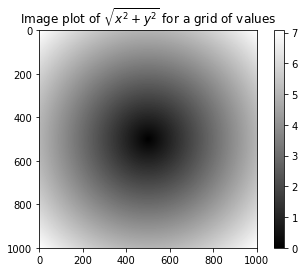

In [65]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 将条件逻辑表述为数组运算

In [66]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [67]:
result = [(x if c else y)
         for x,y,c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [68]:
result = np.where(cond, xarr, yarr)
# 后两个参数都是数组
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [69]:
arr = np.random.randn(4, 4)
arr

array([[ 0.1692951 , -0.92690865, -0.13505647, -0.2061374 ],
       [ 0.30482711, -1.2956824 , -0.65765567, -1.06132304],
       [ 0.55023202,  0.90917526, -0.87566549, -0.37569647],
       [ 0.50576777, -0.6267567 ,  2.29766072,  0.88748595]])

In [70]:
arr > 0

array([[ True, False, False, False],
       [ True, False, False, False],
       [ True,  True, False, False],
       [ True, False,  True,  True]])

In [71]:
arr[arr > 0]

array([0.1692951 , 0.30482711, 0.55023202, 0.90917526, 0.50576777,
       2.29766072, 0.88748595])

In [72]:
np.where(arr > 0, 2, -2)
# 后两个参数都是标量

array([[ 2, -2, -2, -2],
       [ 2, -2, -2, -2],
       [ 2,  2, -2, -2],
       [ 2, -2,  2,  2]])

In [73]:
np.where(arr > 0, 2, arr)
# 替换数组中所有正值

array([[ 2.        , -0.92690865, -0.13505647, -0.2061374 ],
       [ 2.        , -1.2956824 , -0.65765567, -1.06132304],
       [ 2.        ,  2.        , -0.87566549, -0.37569647],
       [ 2.        , -0.6267567 ,  2.        ,  2.        ]])

### 数学和统计方法

In [74]:
arr = np.random.randn(5, 4)
arr

array([[ 1.68335372, -0.78241832, -0.52344204,  1.69303077],
       [-0.01980807,  1.29146265, -0.0852918 , -0.85310283],
       [ 1.60872492,  0.02919198, -0.90654458,  2.35849705],
       [-1.07744287,  1.50824658, -0.15939097,  0.22962914],
       [ 1.04813477, -1.57627558,  1.28445098, -1.88919067]])

##### 聚合函数，aggregation, 返回的结果少一维

In [75]:
arr.mean()

0.24309074174796272

In [76]:
np.mean(arr)

0.24309074174796272

In [77]:
arr.sum()

4.8618148349592545

In [78]:
arr.mean(axis = 1) # 每行的平均值
# 返回的结果会少一维

array([ 0.51763103,  0.08331499,  0.77246734,  0.12526047, -0.28322013])

In [79]:
arr.sum(axis = 0) # 每一列的和

array([ 3.24296247,  0.47020731, -0.39021842,  1.53886347])

##### 非聚合函数，不改变数组维数

In [80]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [81]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [82]:
arr.cumsum(axis = 0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [83]:
arr.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### 用于布尔型数组的方法

In [84]:
arr = np.random.randn(100)

In [85]:
(arr > 0).sum()

50

In [86]:
bools = np.array([False, False,True, False])

In [87]:
bools.any() # 探测是否存在True

True

In [88]:
bools.all() # 探测是否全是True

False

### 排序

In [89]:
arr = np.random.randn(6)
arr

array([ 0.46624293, -0.36219069, -2.19876798, -0.03750474,  0.52479669,
       -0.11616372])

In [90]:
arr.sort()
arr

array([-2.19876798, -0.36219069, -0.11616372, -0.03750474,  0.46624293,
        0.52479669])

In [91]:
arr = np.random.randn(5, 3)
arr

array([[-0.2725385 ,  1.26900042, -0.51449618],
       [ 1.52440569, -1.12837148, -1.51185072],
       [-0.16681416, -1.92134541, -0.90460704],
       [ 1.2903389 ,  0.60329083, -0.12042788],
       [-0.26996561,  0.56523495,  0.69868589]])

In [92]:
arr.sort(1)
arr
# 注意：顶级方法np.sort返回的是数组副本，而就地排序会修改数组本身

array([[-0.51449618, -0.2725385 ,  1.26900042],
       [-1.51185072, -1.12837148,  1.52440569],
       [-1.92134541, -0.90460704, -0.16681416],
       [-0.12042788,  0.60329083,  1.2903389 ],
       [-0.26996561,  0.56523495,  0.69868589]])

In [93]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [94]:
large_arr[int(0.05 * len(large_arr))]

-1.7019646059704718

### 唯一化以及其他的集合逻辑

In [95]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [96]:
np.unique(names) 

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [97]:
ints = np.array([3,3,3,2,2,1,1,4,4])

In [98]:
np.unique(ints) # 找出数组中的唯一值并返回排序结果

array([1, 2, 3, 4])

In [99]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [100]:
values = np.array([6,0,0,3,2,5,6])
values

array([6, 0, 0, 3, 2, 5, 6])

In [101]:
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

## 4.4 用于数组的文件输入输出

In [102]:
arr = np.arange(10)
np.save('some_array', arr)

In [103]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [104]:
np.savez('array_archive.npz', a = arr, b = arr)

In [105]:
arch = np.load('array_archive.npz')

In [106]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [107]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [108]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 4.5 线性代数

In [109]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.],[-1,7],[8,9]])

In [110]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [111]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [112]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [113]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [114]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [115]:
x @ np.ones(3)

array([ 6., 15.])

In [116]:
np.ones(3)

array([1., 1., 1.])

In [117]:
from numpy.linalg import inv, qr

In [118]:
X = np.random.randn(5, 5)
X

array([[ 0.97451147,  1.32278055, -0.64848044,  0.36937705,  0.72073775],
       [-1.00543006, -1.02891839, -1.68358958, -0.99565953,  0.3739573 ],
       [-0.18442679,  0.15161914, -1.88745359,  0.03065241,  0.46921843],
       [-1.77421747, -1.81186702,  0.42675859,  0.67936624, -1.21956262],
       [ 1.44466451, -0.65321394, -2.20980588, -1.98267993,  1.4313866 ]])

In [119]:
mat = X.T.dot(X)
mat

array([[ 7.22947863,  4.56657881, -2.54071374, -2.71427572,  4.47148557],
       [ 4.56657881,  6.54096036,  1.25855105,  1.58189753,  1.91443244],
       [-2.54071374,  1.25855105, 11.88284674,  6.05015637, -5.6661483 ],
       [-2.71427572,  1.58189753,  6.05015637,  5.52127507, -3.75823865],
       [ 4.47148557,  1.91443244, -5.6661483 , -3.75823865,  4.41567347]])

In [120]:
inv(mat)

array([[  3.75454467,   3.31585051,  -4.17036155,  -4.14473324,
        -14.1186046 ],
       [  3.31585051,   7.03359248,  -5.77312553,  -8.23171053,
        -20.82133881],
       [ -4.17036155,  -5.77312553,   5.94864054,   6.79773685,
         20.14491509],
       [ -4.14473324,  -8.23171053,   6.79773685,  10.16678206,
         25.14188326],
       [-14.1186046 , -20.82133881,  20.14491509,  25.14188326,
         70.79904326]])

In [121]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -3.83376696e-16,  1.60345566e-15,
         2.97698797e-15, -5.97599642e-15],
       [-6.47414833e-15,  1.00000000e+00, -2.69653337e-15,
         9.19926952e-15,  2.22683894e-14],
       [-4.90866911e-15, -2.43415505e-14,  1.00000000e+00,
        -6.84593381e-16,  2.37226786e-15],
       [-5.03223947e-15, -1.09410234e-14,  5.54531304e-15,
         1.00000000e+00,  6.13049988e-14],
       [ 1.27431860e-14,  2.26944197e-14, -2.46620128e-14,
        -2.00150739e-15,  1.00000000e+00]])

In [122]:
q, r = qr(mat)
r

array([[-10.34097217,  -6.18441156,   8.17810613,   5.75978986,
         -8.25942586],
       [  0.        ,  -5.75693149, -10.57594239,  -7.42178612,
          3.95364226],
       [  0.        ,   0.        ,  -6.26249749,  -1.57811433,
          2.34397919],
       [  0.        ,   0.        ,   0.        ,  -0.57826235,
          0.20787148],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.0122322 ]])

## 4.6 伪随机数生成

In [123]:
samples = np.random.normal(size = (4,4))
samples

array([[ 0.91179241,  0.87278919,  0.11253802, -0.71279782],
       [ 0.06296079, -0.99880686,  1.28193685, -1.41270743],
       [-0.18751868, -1.78954673,  0.03102481, -1.66327117],
       [ 0.6975639 ,  0.28245445,  2.14442524, -0.15146705]])

In [124]:
from random import normalvariate

In [125]:
N = 100000

In [ ]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

In [ ]:
%timeit np.random.normal(size = N)

In [ ]:
np.random.seed(1234)

In [ ]:
rng = np.random.RandomState(1234)

In [215]:
rng.randn(10)

array([-0.20264632, -0.65596934,  0.19342138,  0.55343891,  1.31815155,
       -0.46930528,  0.67555409, -1.81702723, -0.18310854,  1.05896919])

## 4.7 示例：随机漫步

In [216]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

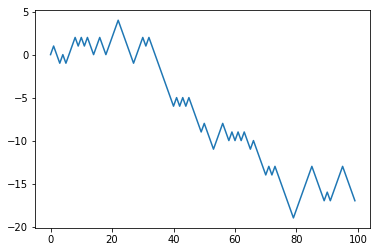

In [217]:
plt.plot(walk[:100])

In [218]:
nsteps = 1000

In [219]:
draws = np.random.randint(0, 2, size = nsteps)

In [220]:
steps = np.where(draws > 0, 1, -1)

In [223]:
walk = steps.cumsum()

In [224]:
walk.min()

-5

In [225]:
walk.max()

70

In [226]:
(np.abs(walk) >= 10).argmax()

197

### 一次模拟多个随机漫步

In [227]:
nwalks = 5000

In [228]:
nsteps = 1000

In [229]:
draws = np.random.randint(0, 2, size = (nwalks, nsteps))

In [230]:
steps = np.where(draws > 0, 1, -1)

In [231]:
walks = steps.cumsum(1)

In [232]:
walks

array([[ -1,  -2,  -1, ...,  36,  37,  38],
       [  1,   2,   1, ...,  42,  43,  42],
       [ -1,  -2,  -3, ..., -46, -45, -46],
       ...,
       [  1,   2,   3, ...,  58,  57,  58],
       [ -1,   0,   1, ...,   8,   7,   8],
       [ -1,  -2,  -3, ...,  30,  29,  30]], dtype=int32)

In [233]:
walks.max()

113

In [235]:
walks.min()

-126

In [236]:
hits30 = (np.abs(walks) >= 30).any(1)

In [237]:
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [238]:
hits30.sum()

3371

In [240]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [241]:
crossing_times.mean()

506.50756452091366

In [243]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))